# Perceptron

#### Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import random
from matplotlib import animation
% matplotlib nbagg

#### Reading CSV Files

In [2]:
data1 = pd.read_csv('datafile1.csv', names = ['X1', 'X2', 'Y'])
data2 = pd.read_csv('datafile2.csv', names = ['X1', 'X2', 'Y'])
data3 = pd.read_csv('datafile3.csv', names = ['X1', 'X2', 'Y'])
data4 = pd.read_csv('datafile4.csv', names = ['X1', 'X2', 'Y'])

## Dataset 1

In [3]:
data1.head()

,X1,X2,Y
0,0.474341,-1.164631,0
1,1.683638,-1.782302,0
2,1.589368,0.049690,1
3,-1.026358,-0.320719,0
4,0.860988,-0.168258,0


#### Scatter Plot of X1 vs X2

<IPython.core.display.Javascript object>


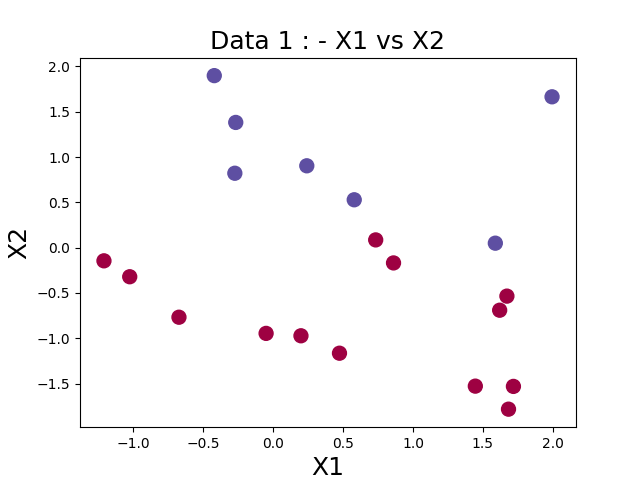

In [465]:
plt.scatter(data1.X1, data1.X2, c = data1.Y , s=100, cmap=plt.cm.Spectral)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 1 : - X1 vs X2', fontsize = 18)
plt.show()

Values having Y = 0 are represented by RED colour and values having Y = 1 are represented by BLUE colour. In this figure it is evident that it can be separated by a line.

#### Setting inital values of weights(w1,w2) and bias(-threshold) using numpy random

In [466]:
X = []
Y = []

for row in data1.iterrows():
    X.append(np.array([row[1][0], row[1][1], 1]))
    Y.append(np.array(row[1][2]))

In [467]:
weights = []

weights.append(np.array([np.random.random_sample(), np.random.random_sample(), -np.random.random_sample()]).reshape(3,1))
print("INITIAL VALUES: W1 =", weights[0][0], "| W2 = ", weights[0][1],"| Bias =" , weights[0][2])

INITIAL VALUES: W1 = [ 0.58780677] | W2 =  [ 0.61704582] | Bias = [-0.16771956]


#### Iterations for 20 Epocs

In [468]:
count = 0
epoc = 1
weights_plot = []

while epoc <= 20:

    total_error = 0
    for i in range(len(X)):
        Y_Actual = Y[i]
        # Predicting Values --
        Activation_value = X[i].dot(weights[0])
        if Activation_value >= 0:
            Y_Predicted = 1
        else:
            Y_Predicted = 0
        # Calculating error --
        error = Y_Actual - Y_Predicted
        total_error += error
        # Updating Values --
        for j in range(len(weights[0])):
            weights[0][j] = weights[0][j] + error*X[i][j]
            
    
    weights_plot.append(np.array([weights[0][0], weights[0][1], weights[0][2]]).reshape(3,1))
    print("Epoc: ", epoc, " -> Total Error = ", total_error)
    
    if total_error == 0:
        count+=1
        if count >=5 :
            print("\nModel is Linearly Seperable!")
            w1, w2, bias =  weights[0][0], weights[0][1], weights[0][2]
            print("W1 =", w1, "| W2 = ", w2, "| Bias = ", bias, "---> Found at EPOC:", epoc)
            break
    else:
        count = 0
    
    epoc += 1  
    
if count != 5:
    print("\nThis model is not linearly separable!")

Epoc:  1  -> Total Error =  -1.0
Epoc:  2  -> Total Error =  0.0
Epoc:  3  -> Total Error =  0.0
Epoc:  4  -> Total Error =  0.0
Epoc:  5  -> Total Error =  0.0
Epoc:  6  -> Total Error =  0.0

Model is Linearly Seperable!
W1 = [ 0.82997138] | W2 =  [ 3.35854684] | Bias =  [-1.16771956] ---> Found at EPOC: 6


#### Plot of Scatter-Line: WITHOUT ANIMATION

<IPython.core.display.Javascript object>


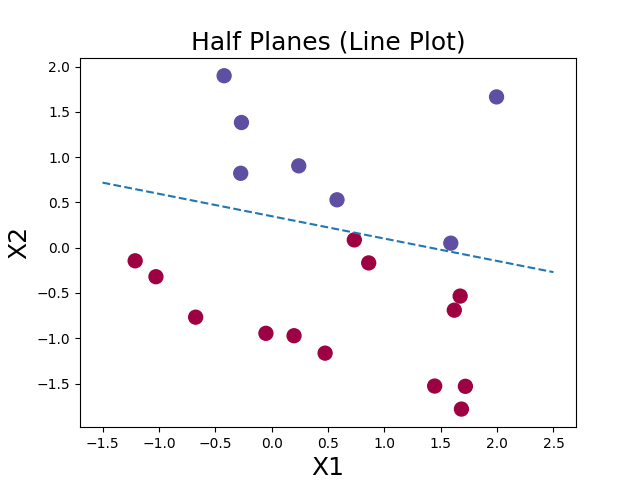

In [469]:
## Line Plotplt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 1 : - X1 vs X2', fontsize = 18)
plt.show()
x = np.arange(-1.5, 3)
y = -x*(w1/w2) - bias/w2
## fit with np.polyfit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '--')

# Scatter Plot
plt.scatter(data1.X1, data1.X2, c = data1.Y , s=100, cmap=plt.cm.Spectral)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Half Planes (Line Plot)', fontsize = 18)
plt.show()

#### Plots - With Animation

<IPython.core.display.Javascript object>


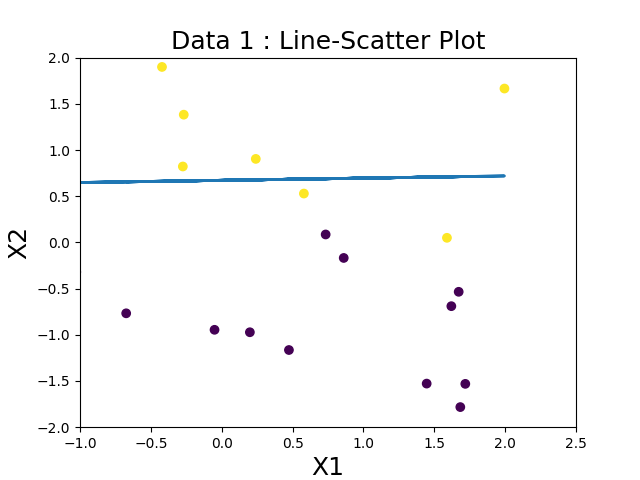

In [447]:
# ANIMATION - First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-1, 2.5), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

ax.scatter(data1.X1, data1.X2, c = data1.Y)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = data1.X1
    y = -x*(weights_plot[i][0]/weights_plot[i][1]) - weights_plot[i][2]/weights_plot[i][1]
    line.set_data(x, y)
    return line

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate, init_func = init, frames = len(weights_plot), interval=20, blit=True)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 1 : Line-Scatter Plot', fontsize = 18)
plt.show()

This Model is linearly Separable

.

## Dataset 2

<IPython.core.display.Javascript object>


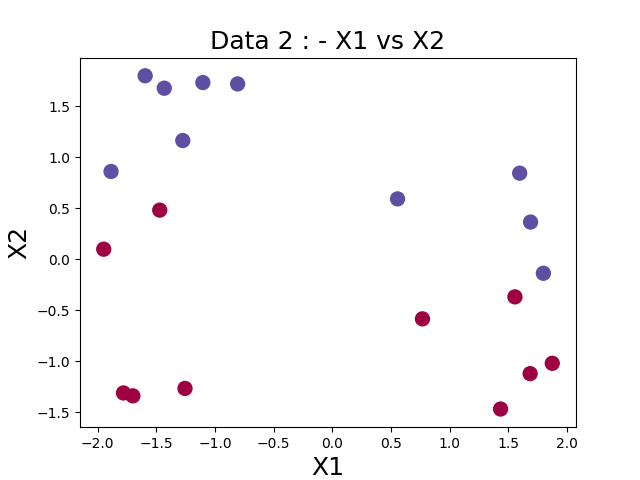

In [450]:
plt.scatter(data2.X1, data2.X2, c = data2.Y, s=100, cmap=plt.cm.Spectral)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 2 : - X1 vs X2', fontsize = 18)
plt.show()

In [448]:
X = []
Y = []

for row in data2.iterrows():
    X.append(np.array([row[1][0], row[1][1], 1]))
    Y.append(np.array(row[1][2]))

In [453]:
weights = []

weights.append(np.array([np.random.random_sample(), np.random.random_sample(), -np.random.random_sample()]).reshape(3,1))
print("INITIAL VALUES: W1 =", weights[0][0], "| W2 = ", weights[0][1],"| Bias =" , weights[0][2])

INITIAL VALUES: W1 = [ 0.68889309] | W2 =  [ 0.00519642] | Bias = [-0.37160218]


#### Iterations for 20 Epocs

In [455]:
count = 0
epoc = 1
weights_plot = []

while epoc <= 20:

    total_error = 0
    for i in range(len(X)):
        Y_Actual = Y[i]
        # Predicting Values --
        Activation_value = X[i].dot(weights[0])
        if Activation_value >= 0:
            Y_Predicted = 1
        else:
            Y_Predicted = 0
        # Calculating error --
        error = Y_Actual - Y_Predicted
        total_error += error
        # Updating Values --
        for j in range(len(weights[0])):
            weights[0][j] = weights[0][j] + error*X[i][j]
            
    
    weights_plot.append(np.array([weights[0][0], weights[0][1], weights[0][2]]).reshape(3,1))
    print("Epoc: ", epoc, " -> Total Error = ", total_error)
    
    if total_error == 0:
        count+=1
        if count >=5 :
            print("\nModel is Linearly Seperable!")
            w1, w2, bias =  weights[0][0], weights[0][1], weights[0][2]
            print("W1 =", w1, "| W2 = ", w2, "| Bias = ", bias, "---> Found at EPOC:", epoc)
            break
    else:
        count = 0
    
    epoc += 1  
    
if count != 5:
    print("\nThis model is not linearly separable!")

Epoc:  1  -> Total Error =  0.0
Epoc:  2  -> Total Error =  0.0
Epoc:  3  -> Total Error =  0.0
Epoc:  4  -> Total Error =  0.0
Epoc:  5  -> Total Error =  0.0

Model is Linearly Seperable!
W1 = [ 1.87894404] | W2 =  [ 7.34965082] | Bias =  [-2.37160218] ---> Found at EPOC: 5


#### PLOT

<IPython.core.display.Javascript object>


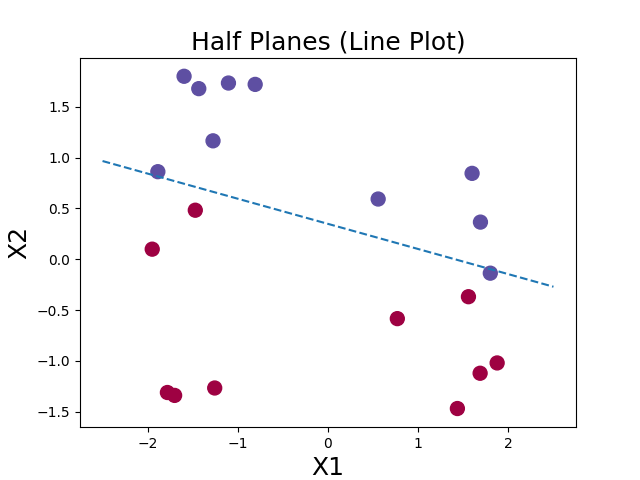

In [472]:
## Line Plot
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
x = np.arange(-2.5, 3.5)
y = -x*(w1/w2) - bias/w2
## fit with np.polyfit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '--')

# Scatter Plot
plt.scatter(data2.X1, data2.X2, c = data2.Y , s=100, cmap=plt.cm.Spectral)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Half Planes (Line Plot)', fontsize = 18)
plt.show()

<IPython.core.display.Javascript object>


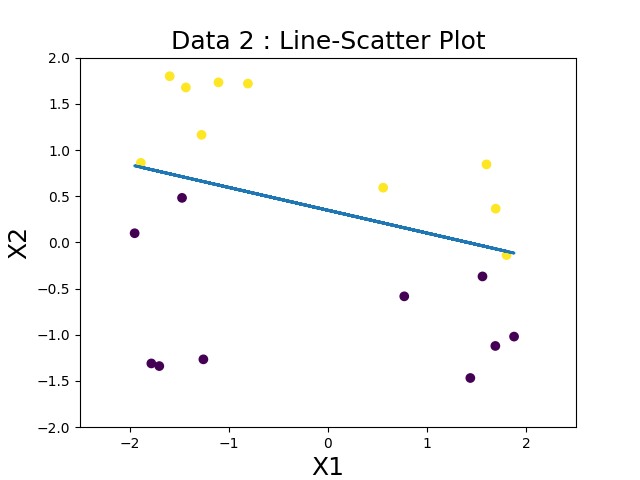

In [470]:
# ANIMATION - First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-2.5, 2.5), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

ax.scatter(data2.X1, data2.X2, c = data2.Y)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = data2.X1
    y = -x*(weights_plot[i][0]/weights_plot[i][1]) - weights_plot[i][2]/weights_plot[i][1]
    line.set_data(x, y)
    return line

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate, init_func = init, frames = len(weights_plot), interval=20, blit=True)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 2 : Line-Scatter Plot', fontsize = 18)
plt.show()

This Model is linearly Separable

.

## Dataset 3

<IPython.core.display.Javascript object>


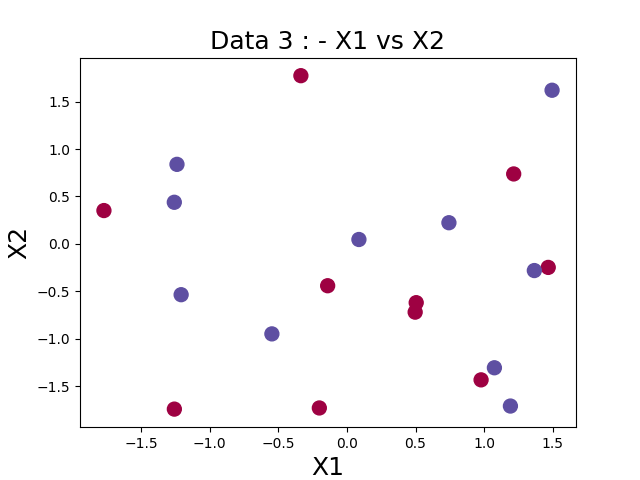

In [82]:
plt.scatter(data3.X1, data3.X2, c = data3.Y, s=100, cmap=plt.cm.Spectral)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 3 : - X1 vs X2', fontsize = 18)
plt.show()

In [476]:
X = []
Y = []

for row in data3.iterrows():
    X.append(np.array([row[1][0], row[1][1], 1]))
    Y.append(np.array(row[1][2]))

In [477]:
weights = []

weights.append(np.array([np.random.random_sample(), np.random.random_sample(), -np.random.random_sample()]).reshape(3,1))
print("INITIAL VALUES: W1 =", weights[0][0], "| W2 = ", weights[0][1],"| Bias =" , weights[0][2])

INITIAL VALUES: W1 = [ 0.18527595] | W2 =  [ 0.51589562] | Bias = [-0.17731607]


#### Iterations for 20 Epocs

In [478]:
count = 0
epoc = 1
weights_plot = []

while epoc <= 20:

    total_error = 0
    for i in range(len(X)):
        Y_Actual = Y[i]
        # Predicting Values --
        Activation_value = X[i].dot(weights[0])
        if Activation_value >= 0:
            Y_Predicted = 1
        else:
            Y_Predicted = 0
        # Calculating error --
        error = Y_Actual - Y_Predicted
        total_error += error
        # Updating Values --
        for j in range(len(weights[0])):
            weights[0][j] = weights[0][j] + error*X[i][j]
            
    
    weights_plot.append(np.array([weights[0][0], weights[0][1], weights[0][2]]).reshape(3,1))
    print("Epoc: ", epoc, " -> Total Error = ", total_error)
    
    if total_error == 0:
        count+=1
        if count >=5 :
            print("\nModel is Linearly Seperable!")
            w1, w2, bias =  weights[0][0], weights[0][1], weights[0][2]
            print("W1 =", w1, "| W2 = ", w2, "| Bias = ", bias, "---> Found at EPOC:", epoc)
            break
    else:
        count = 0
    
    epoc += 1  
    
if count != 5:
    print("\nThis model is not linearly separable!")

Epoc:  1  -> Total Error =  -1.0
Epoc:  2  -> Total Error =  0.0
Epoc:  3  -> Total Error =  1.0
Epoc:  4  -> Total Error =  0.0
Epoc:  5  -> Total Error =  0.0
Epoc:  6  -> Total Error =  -1.0
Epoc:  7  -> Total Error =  1.0
Epoc:  8  -> Total Error =  0.0
Epoc:  9  -> Total Error =  0.0
Epoc:  10  -> Total Error =  0.0
Epoc:  11  -> Total Error =  -1.0
Epoc:  12  -> Total Error =  0.0
Epoc:  13  -> Total Error =  1.0
Epoc:  14  -> Total Error =  -1.0
Epoc:  15  -> Total Error =  0.0
Epoc:  16  -> Total Error =  1.0
Epoc:  17  -> Total Error =  0.0
Epoc:  18  -> Total Error =  -1.0
Epoc:  19  -> Total Error =  0.0
Epoc:  20  -> Total Error =  1.0

This model is not linearly separable!


#### PLOT

<IPython.core.display.Javascript object>


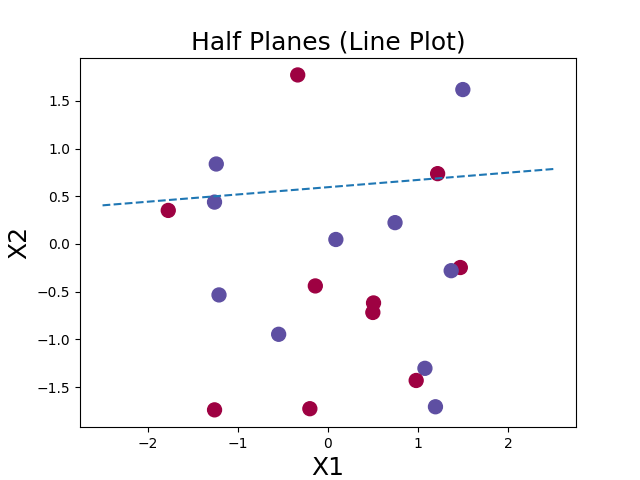

In [479]:
## Line Plot
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
x = np.arange(-2.5, 3.5)
y = -x*(w1/w2) - bias/w2
## fit with np.polyfit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '--')

# Scatter Plot
plt.scatter(data3.X1, data3.X2, c = data3.Y , s=100, cmap=plt.cm.Spectral)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Half Planes (Line Plot)', fontsize = 18)
plt.show()

#### PLOT ANIMATION 

<IPython.core.display.Javascript object>


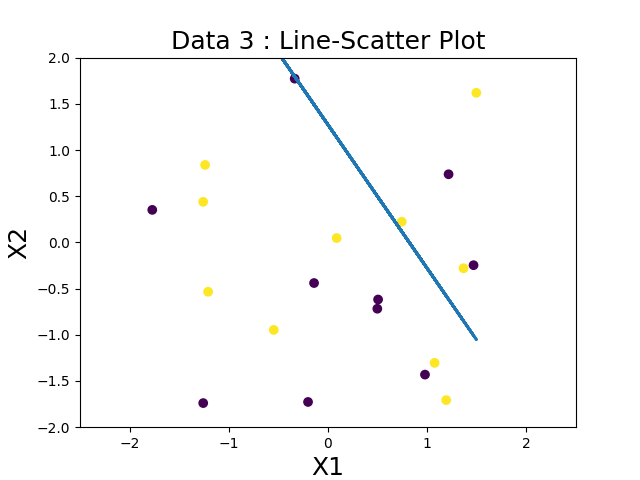

In [480]:
fig = plt.figure()
ax = plt.axes(xlim=(-2.5, 2.5), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

ax.scatter(data3.X1, data3.X2, c = data3.Y)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = data3.X1
    y = -x*(weights_plot[i][0]/weights_plot[i][1]) - weights_plot[i][2]/weights_plot[i][1]
    line.set_data(x, y)
    return line

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate, init_func = init, frames = len(weights_plot), interval=20, blit=True)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 3 : Line-Scatter Plot', fontsize = 18)
plt.show()

This Model is NOT linearly Separable

.

## Dataset 4

<IPython.core.display.Javascript object>


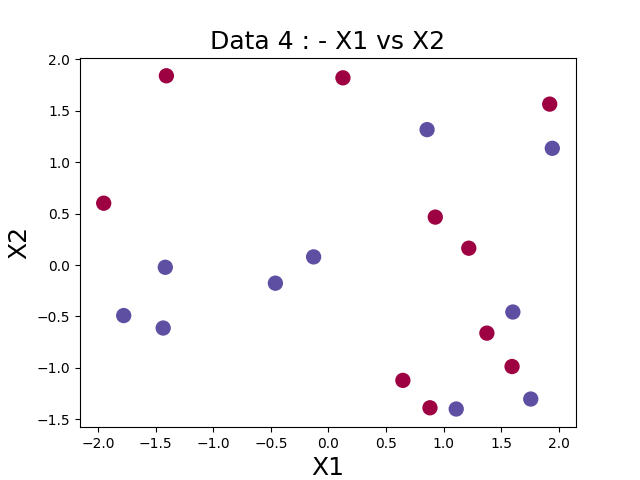

In [500]:
plt.scatter(data4.X1, data4.X2, c = data4.Y, s=100, cmap=plt.cm.Spectral)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('Data 4 : - X1 vs X2', fontsize = 18)
plt.show()

In [501]:
w1 = np.random.random_sample()
w2 = np.random.random_sample()
bias = -1 * np.random.random_sample()

print("INITIAL VALUES: W1 = ", w1, "| W2 = ", w1,"| Bias =" , bias)

INITIAL VALUES: W1 =  0.5724058285414161 | W2 =  0.5724058285414161 | Bias = -0.34503554708854045


In [502]:
count = 0
epoc = 1

while epoc <= 20:
    
    total_error = 0
    for row in data4.iterrows():
        X1 = row[1][0]
        X2 = row[1][1]
        Y_Actual = row[1][2]        
        Activation_value = X1 * w1 + X2 * w2 + bias
        if Activation_value >= 0:
            Y_Predicted = 1
        else:
            Y_Predicted = 0
        error = Y_Actual - Y_Predicted         
        w1 = w1 + error*X1
        w2 = w2 + error*X2
        bias = bias + error
        total_error += error

    print("Epoc: ", epoc, " -> Total Error = ", total_error)
    
    if total_error == 0:
        count+=1
        if count >=5 :
            print("\nModel is Linearly Seperable!")
            print("W1 =", w1, "| W2 = ", w2, "| Bias = ", bias, "---> Found at EPOC:", epoc, " Continous TE:0 =", count)
            break
    else:
        count = 0
    
    epoc += 1  
    
if count != 5:
    print("\nThis model is not linearly separable!")

Epoc:  1  -> Total Error =  0.0
Epoc:  2  -> Total Error =  0.0
Epoc:  3  -> Total Error =  -1.0
Epoc:  4  -> Total Error =  1.0
Epoc:  5  -> Total Error =  0.0
Epoc:  6  -> Total Error =  0.0
Epoc:  7  -> Total Error =  0.0
Epoc:  8  -> Total Error =  -1.0
Epoc:  9  -> Total Error =  1.0
Epoc:  10  -> Total Error =  0.0
Epoc:  11  -> Total Error =  0.0
Epoc:  12  -> Total Error =  -1.0
Epoc:  13  -> Total Error =  1.0
Epoc:  14  -> Total Error =  -1.0
Epoc:  15  -> Total Error =  1.0
Epoc:  16  -> Total Error =  0.0
Epoc:  17  -> Total Error =  0.0
Epoc:  18  -> Total Error =  0.0
Epoc:  19  -> Total Error =  -1.0
Epoc:  20  -> Total Error =  1.0

This model is not linearly separable!


<IPython.core.display.Javascript object>


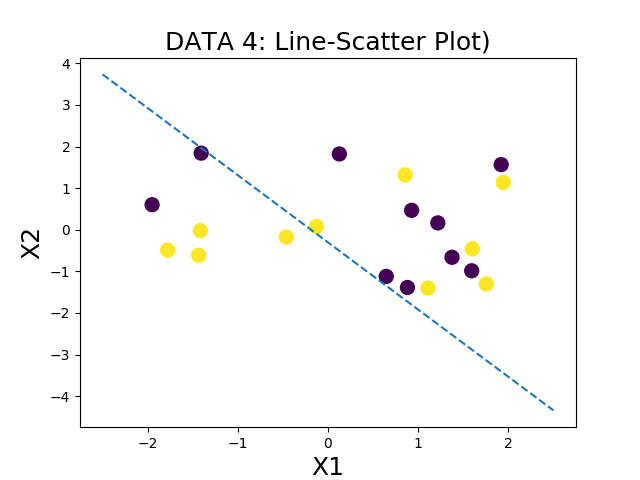

In [503]:
# Line Plot
x = np.arange(-2.5, 3)
y = -x*(w1/w2) - bias/w2
## fit with np.polyfit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '--')


# Scatter Plot
plt.scatter(data4.X1, data4.X2, c = data4.Y , s=100)
plt.xlabel('X1', fontsize = 18)
plt.ylabel('X2', fontsize = 18)
plt.title('DATA 4: Line-Scatter Plot)', fontsize = 18)
plt.show()

This model is NOT linearly separable